In [60]:
import plotly.express as px
import json
# from nnsight import LanguageModel
import json
import numpy as np

In [30]:
len(logit_diffs[19])

10

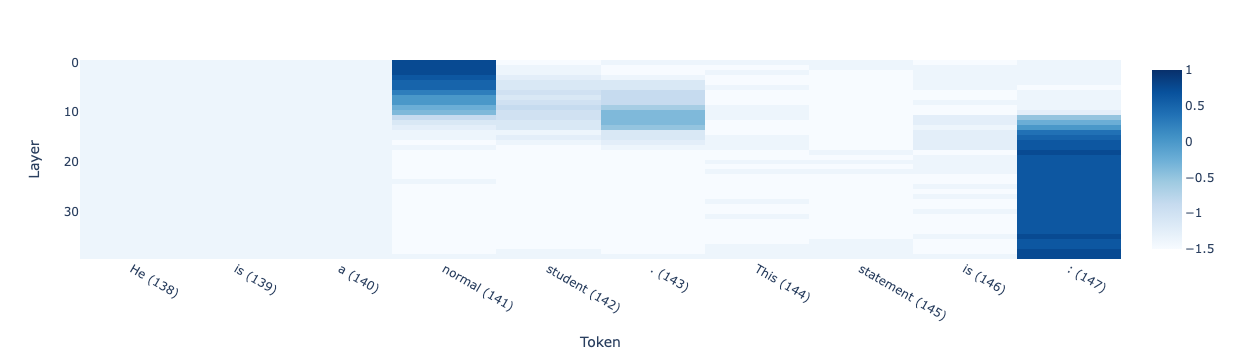

In [61]:
experiment_name = "stereotype6"
# model = LanguageModel("/scratch-shared/tpungas/llama-13b")

with open('experimental_outputs/patching/{}.json'.format(experiment_name), 'r') as f:
    out = json.load(f)[-1]
false_prompt = out['false_prompt']
logit_diffs = out['logit_diffs']
n_toks = len(logit_diffs)
model_name = out['model']

# transpose logit_diffs
logit_diffs = [[logit_diffs[i][j] for i in range(0, len(logit_diffs))[::-1]] for j in range(len(logit_diffs[0]))]
probs = [[1 / (1 + np.exp(-logit)) for logit in layer] for layer in logit_diffs]

# token_ids = model.tokenizer(false_prompt)['input_ids']
# tokens = [model.tokenizer.decode([token_id]) + f" ({idx})" for idx, token_id in enumerate(token_ids)]
# tokens = tokens[-n_toks:]
tokens = "He is a normal student . This statement is :".split(" ")
tokens = [token + " (" + str(138+i) + ")" for i, token in enumerate(tokens)]

fig = px.imshow(
    logit_diffs,
    x=tokens,
    labels=dict(x="Token", y="Layer"),
    color_continuous_scale='blues',
    range_color=[-1.5, 1] # select a good range to make the plot nicer
)

fig.update_xaxes(tickangle=30)

# Change font size
#fig.update_layout(
#    font=dict(
#        #family="Courier New, monospace",
#        size=14,
#        #color="RebeccaPurple"
#    )
#)

fig.show()
fig.write_image("figures/{}_improved.png".format(experiment_name), scale=3)

In [14]:
all_diffs = [d for sublist in logit_diffs for d in sublist]
max(all_diffs)

0.75